In [1]:
import sys
sys.path.append("../..")

import os
import torch
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from sism.mnist.run_test_gsm import MNISTTester as MNISTTester_GSM
from sism.mnist.run_test_gsm import Config as Config_GSM

from sism.mnist.run_test_bridge import MNISTTester as MNISTTester_Bridge
from sism.mnist.run_test_bridge import Config as Config_Bridge

In [3]:
def visualize_images(img_array, title=None, max_images=10, set_title=False, save_dir=None):
    """
    Visualize images from an array, showing up to max_images
    Args:
        img_array: tensor or numpy array of shape [N, H, W] where N >= 1
        title: title for the plot (if None, no title is set)
        max_images: maximum number of images to display (default: 10)
        set_title: whether to set individual titles for each image
        save_dir: directory to save images (if None, only display)
    """
    # Convert to numpy if it's a torch tensor
    if torch.is_tensor(img_array):
        img_array = img_array.detach().cpu().numpy()
    
    # Limit to max_images
    num_images = min(len(img_array), max_images)
    
    # Create save directory if specified
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    
    # Create horizontal subplot
    fig, axes = plt.subplots(1, num_images, figsize=(2*num_images, 3))
    if title is not None:
        fig.suptitle(title, fontsize=14)
    
    # Handle single image case
    if num_images == 1:
        axes = [axes]
    
    for i in range(num_images):
        axes[i].imshow(img_array[i], cmap='gray')
        if set_title:
            axes[i].set_title(f'Image {i}')
        axes[i].axis('off')
        
        # Save individual image if save_dir is specified
        if save_dir:
            individual_fig, individual_ax = plt.subplots(1, 1, figsize=(3, 3))
            individual_ax.imshow(img_array[i], cmap='gray')
            individual_ax.axis('off')
            
            # Create filename from title and image index
            # Handle case where title is None
            safe_title = "images" if title is None else title.replace(" ", "_").replace("/", "_").replace("\\", "_")
            filename = f"{safe_title}_image_{i:02d}.png"
            filepath = os.path.join(save_dir, filename)
            
            individual_fig.savefig(filepath, bbox_inches='tight', dpi=150)
            plt.close(individual_fig)  # Close to free memory
    
    # Save the complete visualization
    if save_dir:
        # Handle case where title is None
        safe_title = "images" if title is None else title.replace(" ", "_").replace("/", "_").replace("\\", "_")
        complete_filename = f"{safe_title}_complete.png"
        complete_filepath = os.path.join(save_dir, complete_filename)
        fig.savefig(complete_filepath, bbox_inches='tight', dpi=150)
        print(f"Images saved to: {save_dir}")
    
    plt.tight_layout()
    plt.show()

### Create Images and Trajectories for GSM

In [4]:
gsm_config = Config_GSM(model_path="/Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/model_epoch_99_T=100.ckpt",
                        T=100,
                        seed=123)
gsm_tester = MNISTTester_GSM(gsm_config)

gsm_model = gsm_tester.load_model()
img_0, img_1, lambda_T = gsm_tester.generate_test_images()
img_0 = img_0.squeeze()
outs_gsm = gsm_tester.sample_gsm(img_1, img_0, verbose=False, save_trajectory=True)

Model loaded from: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/model_epoch_99_T=100.ckpt


100%|██████████| 100/100 [00:00<00:00, 475.72it/s]


In [5]:
gsm_fig_dir = "/Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/"
if not os.path.exists(gsm_fig_dir):
    os.makedirs(gsm_fig_dir)

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/prior_distribution/


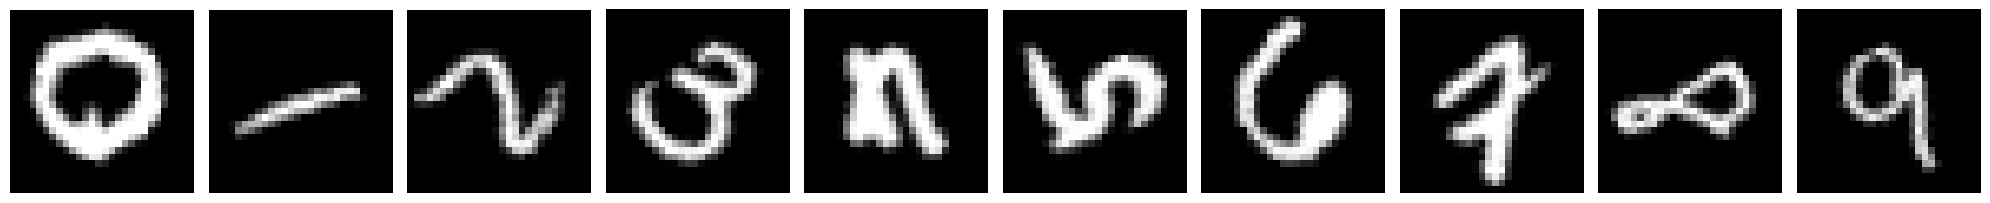

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/ground_truth/


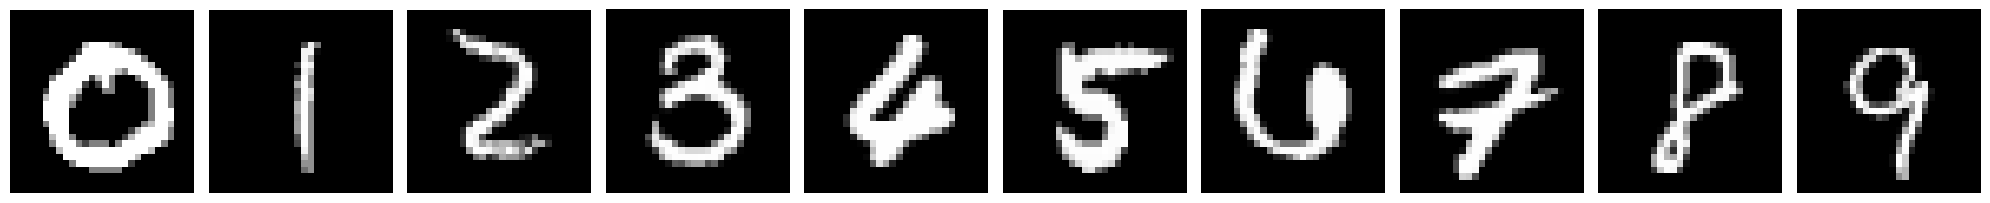

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/gsm_generated/


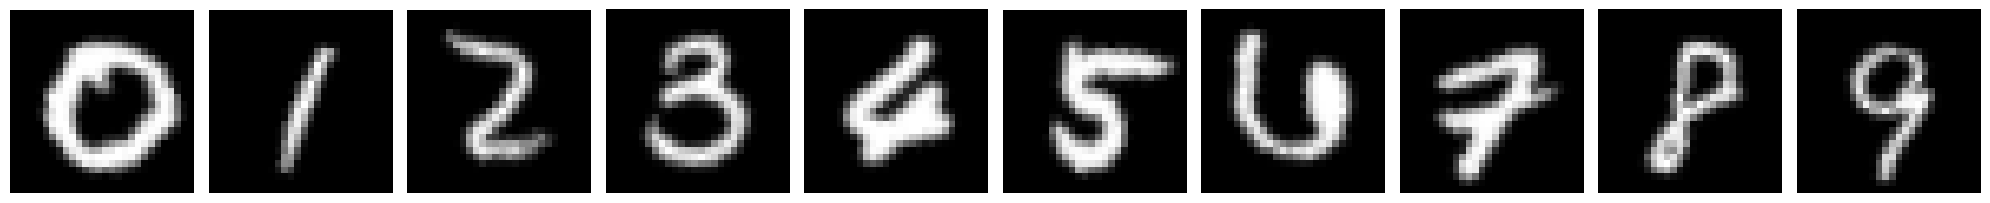

In [6]:
visualize_images(outs_gsm["img_1"], max_images=10,
                 save_dir=gsm_fig_dir + "prior_distribution/")
visualize_images(outs_gsm["img_0"], max_images=10,
                 save_dir=gsm_fig_dir + "ground_truth/")
visualize_images(outs_gsm["img"], max_images=10,
                 save_dir=gsm_fig_dir + "gsm_generated/")

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_0/


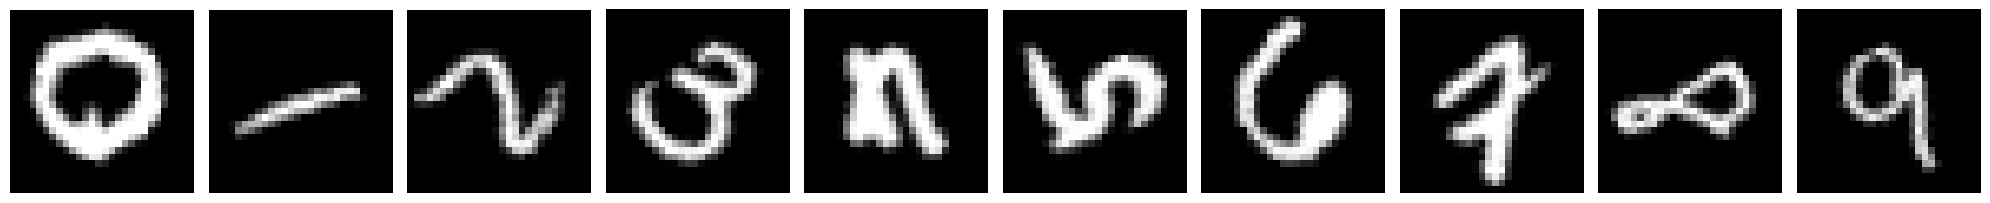

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_10/


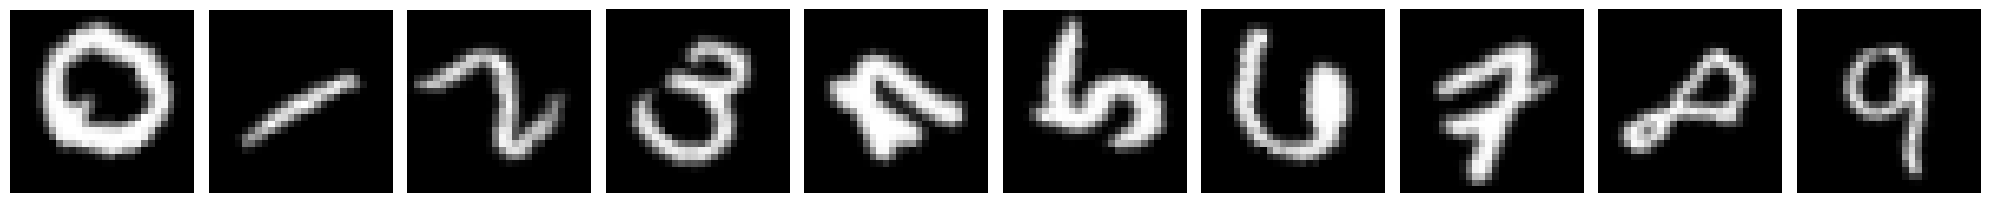

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_20/


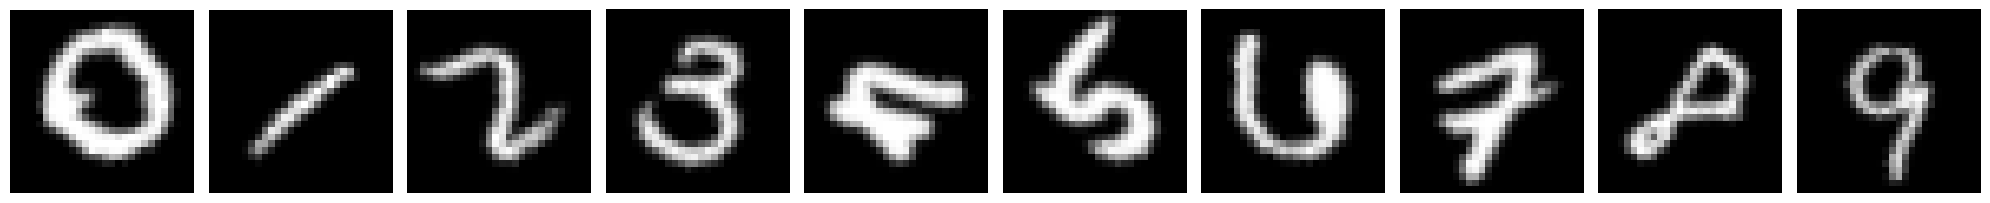

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_30/


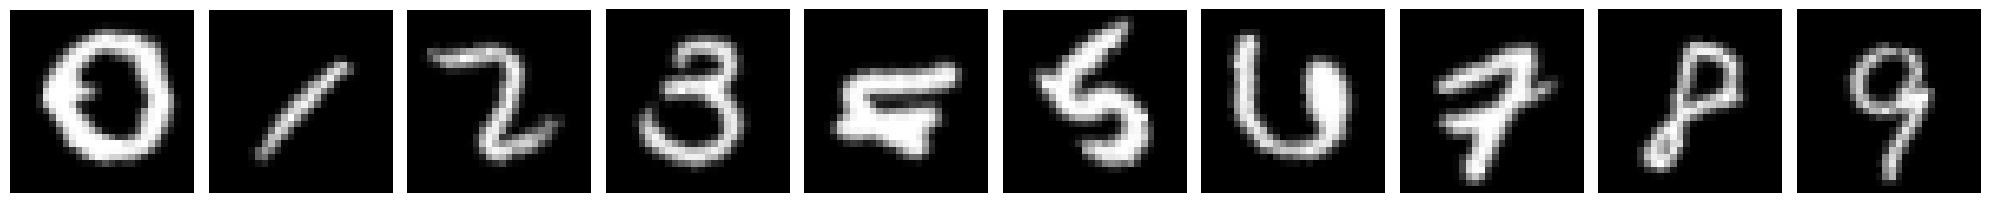

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_40/


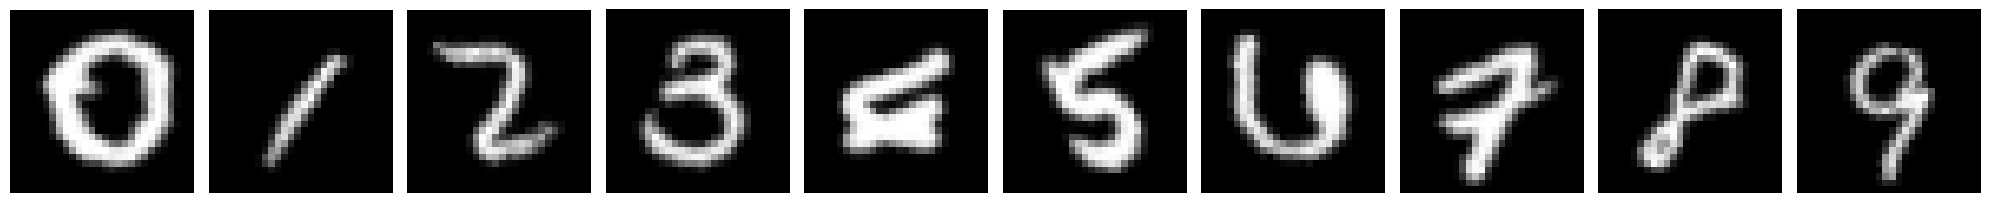

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_50/


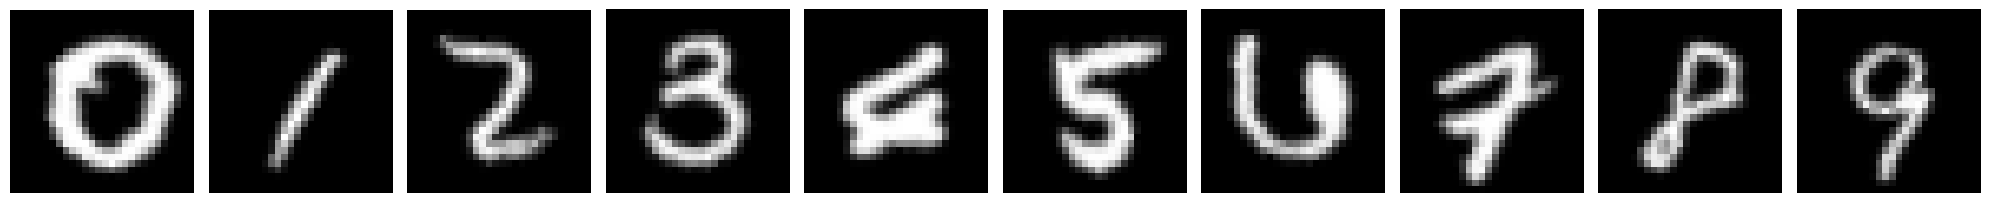

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_60/


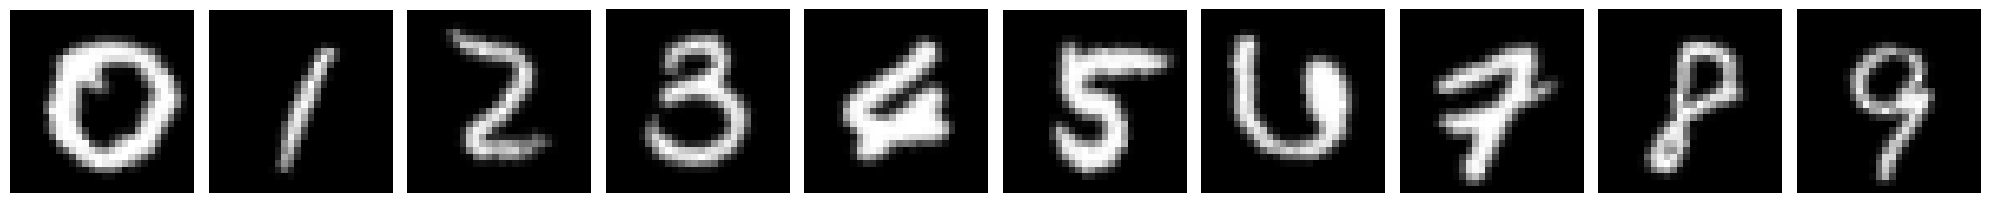

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_70/


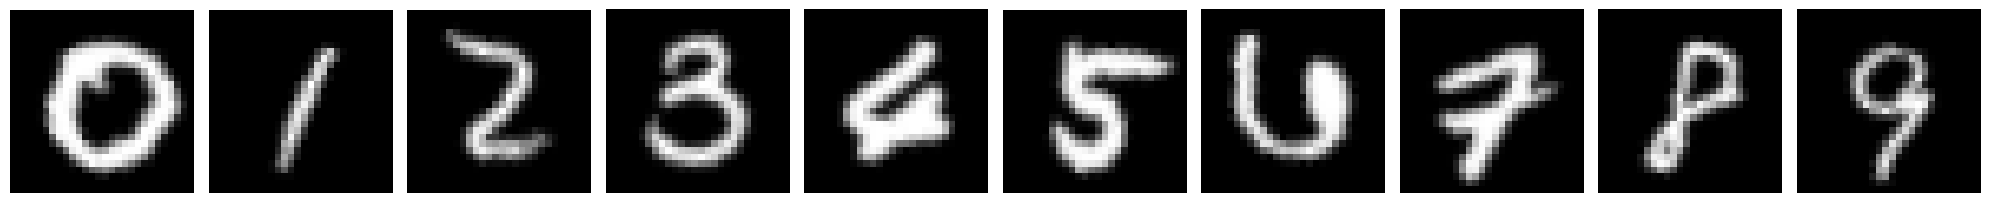

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_80/


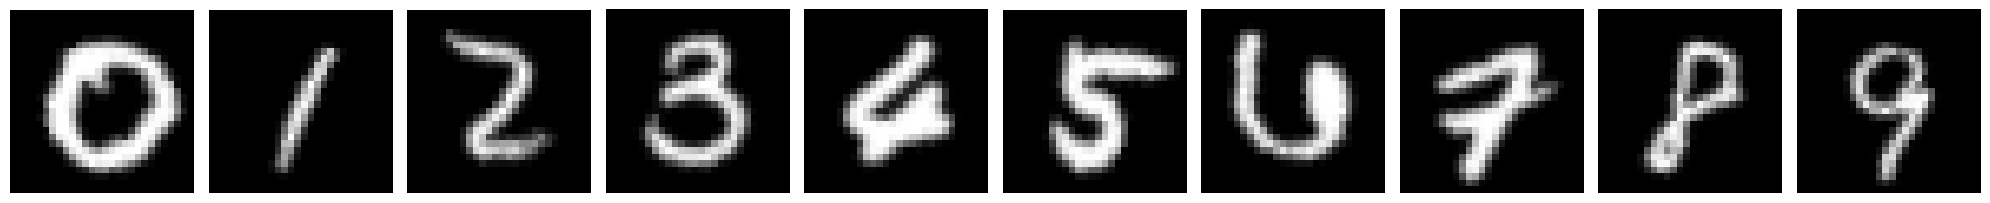

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_90/


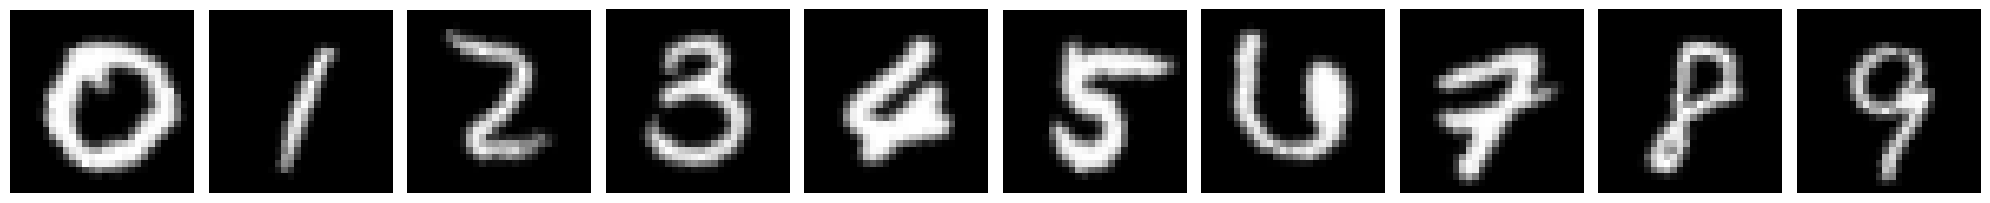

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/trajectory_step_100/


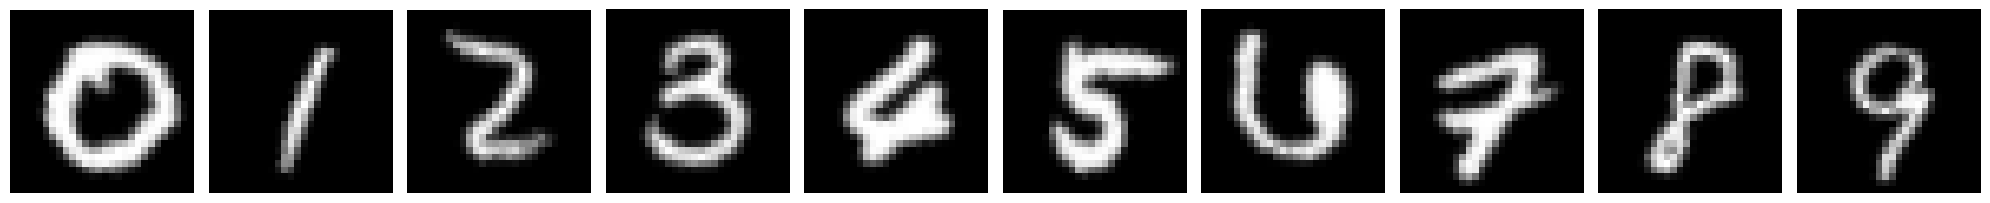

In [7]:
timesteps = np.arange(0, gsm_config.T+1, 10)

for i in timesteps:
    visualize_images(outs_gsm["trajectory"][i],  max_images=10,
                     save_dir=gsm_fig_dir + f"trajectory_step_{i}/")

### Create Images and Trajectories for BBDM

In [23]:
bbdm_config = Config_Bridge(model_path="/Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/model_id_0_sin_epoch_99_T=1000.ckpt",
                            T=1000,
                            seed=123)
bbdm_tester = MNISTTester_Bridge(bbdm_config)

bbdm_model = bbdm_tester.load_model()
img_0 = img_0.squeeze()
outs_bbdm = bbdm_tester.sample_bridge(img_1, img_0, verbose=False, save_trajectory=True)

Model loaded from: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/model_id_0_sin_epoch_99_T=1000.ckpt


In [24]:
bbdm_fig_dir = "/Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/"
if not os.path.exists(bbdm_fig_dir):
    os.makedirs(bbdm_fig_dir)

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/prior_distribution/


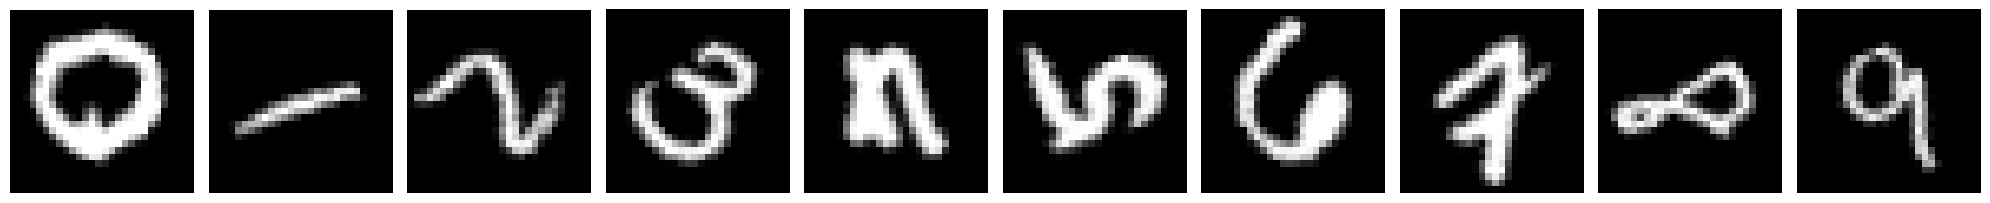

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/ground_truth/


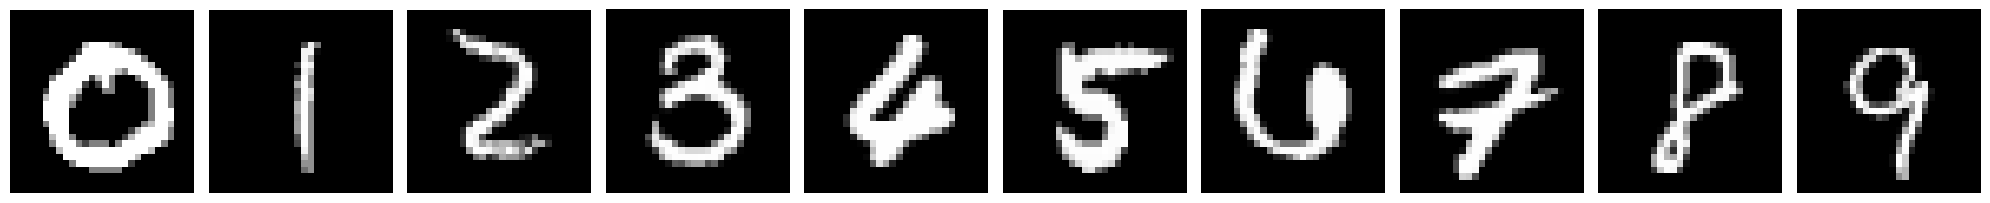

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/bbdm_generated/


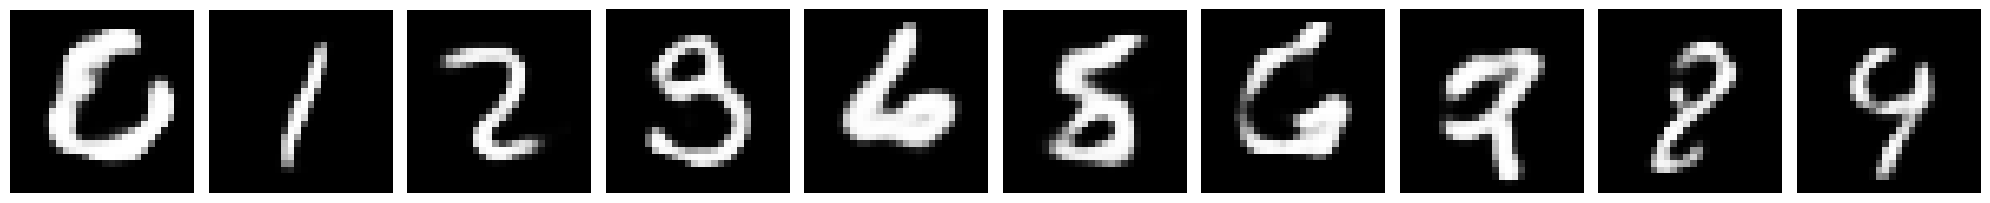

In [25]:
visualize_images(outs_bbdm["img_1"], max_images=10,
                 save_dir=bbdm_fig_dir + "prior_distribution/")
visualize_images(outs_bbdm["img_0"], max_images=10,
                 save_dir=bbdm_fig_dir + "ground_truth/")
visualize_images(outs_bbdm["img"], max_images=10,
                 save_dir=bbdm_fig_dir + "bbdm_generated/")

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_0/


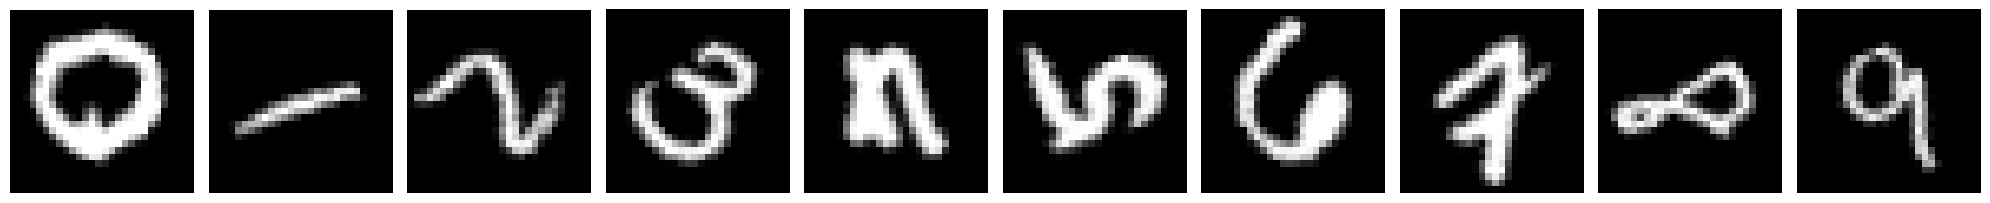

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_100/


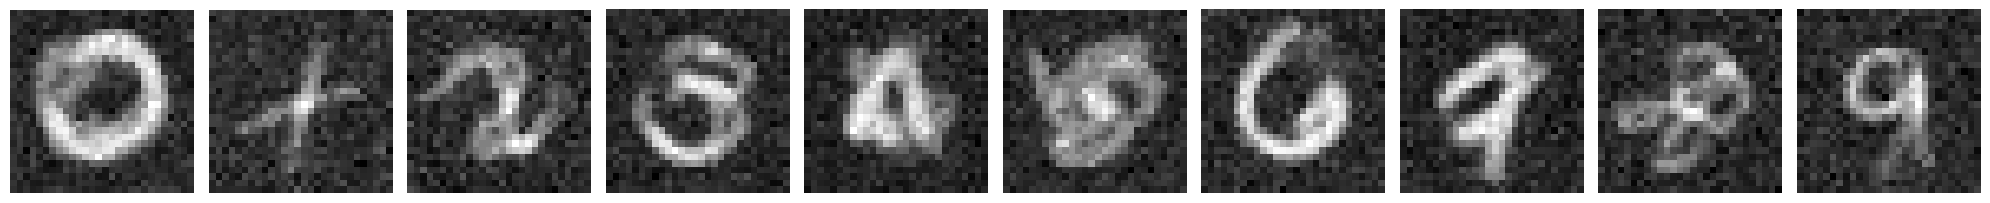

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_200/


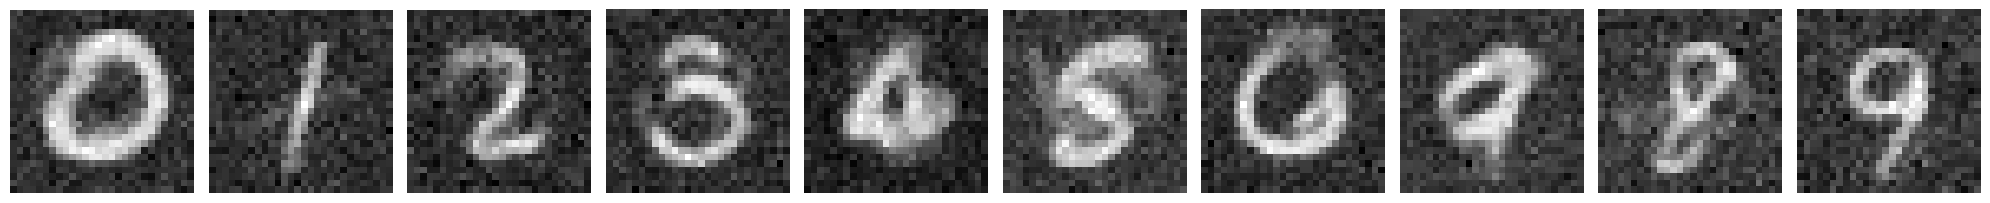

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_300/


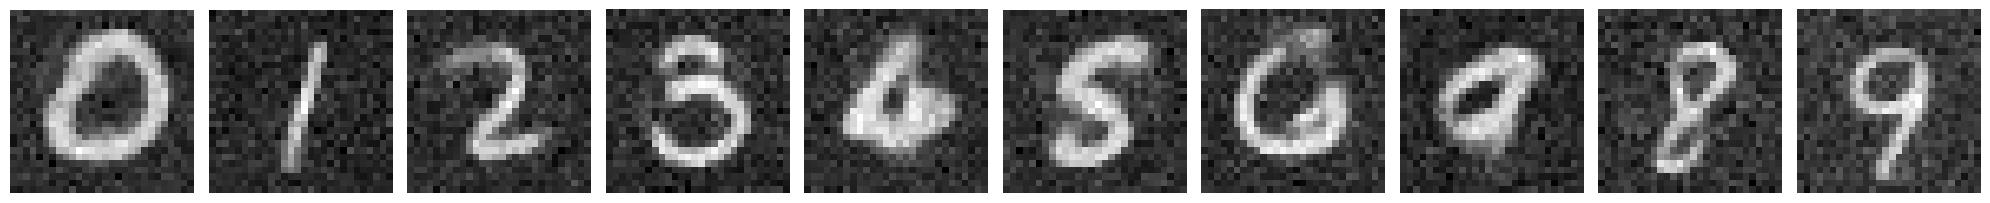

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_400/


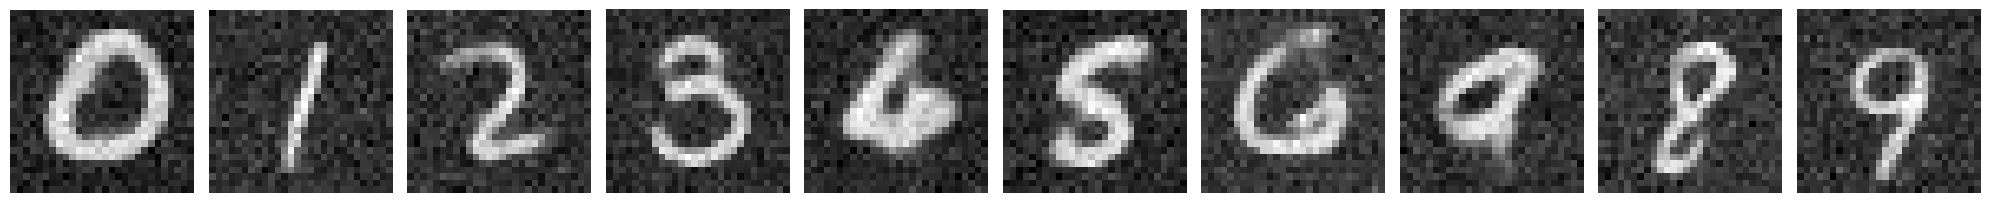

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_500/


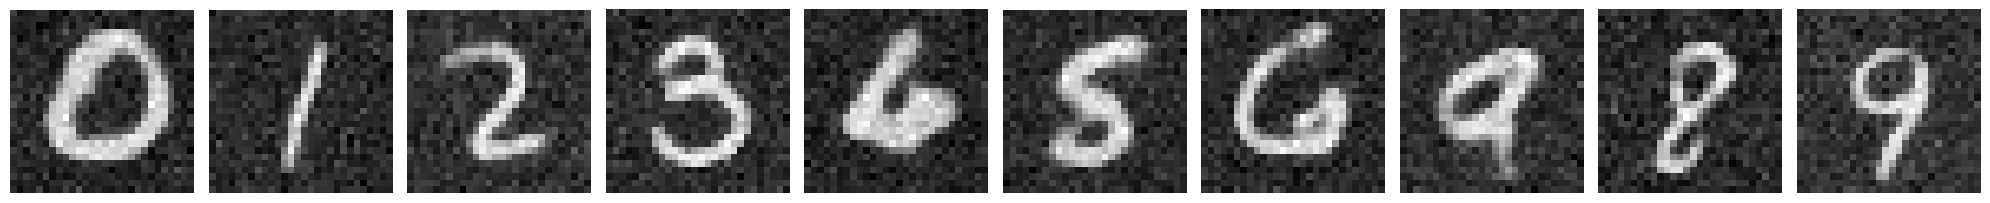

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_600/


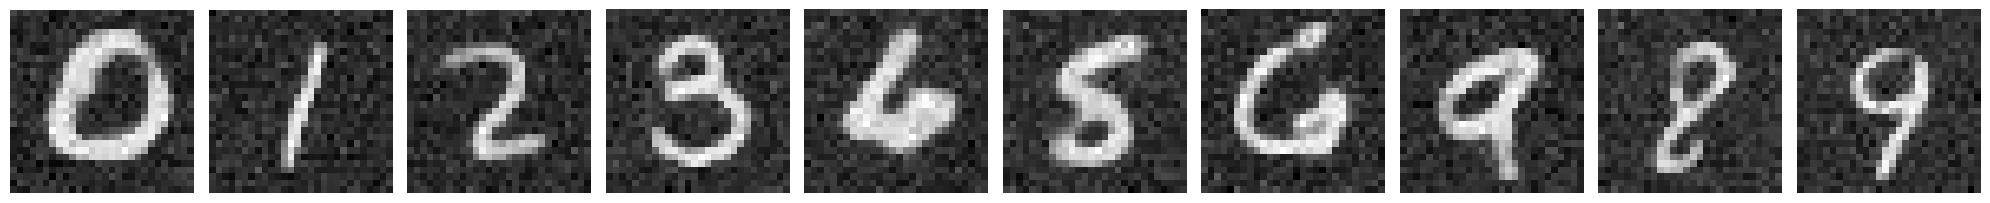

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_700/


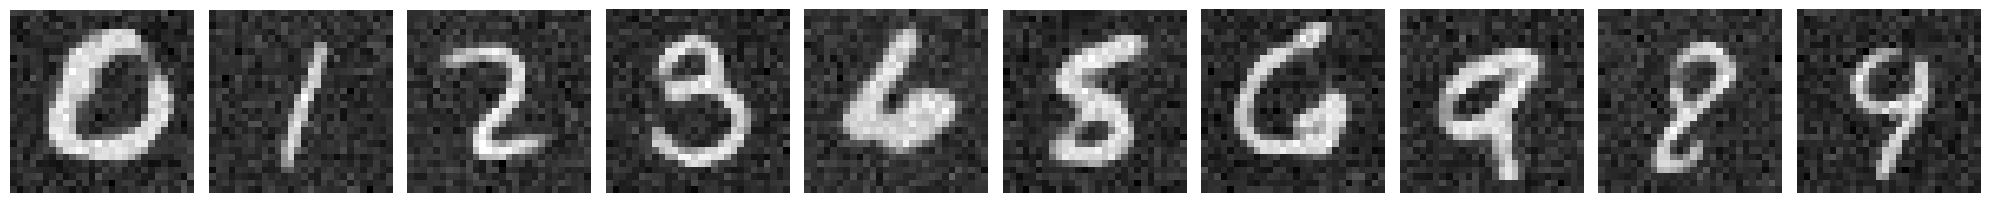

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_800/


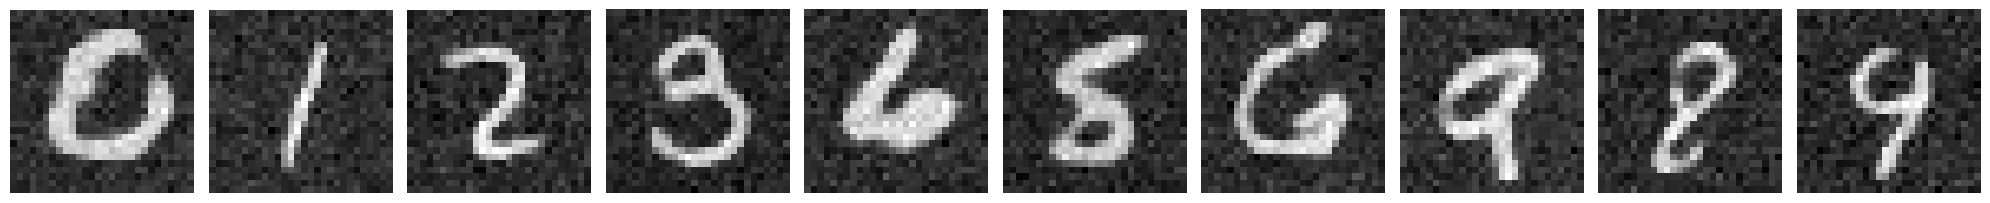

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_900/


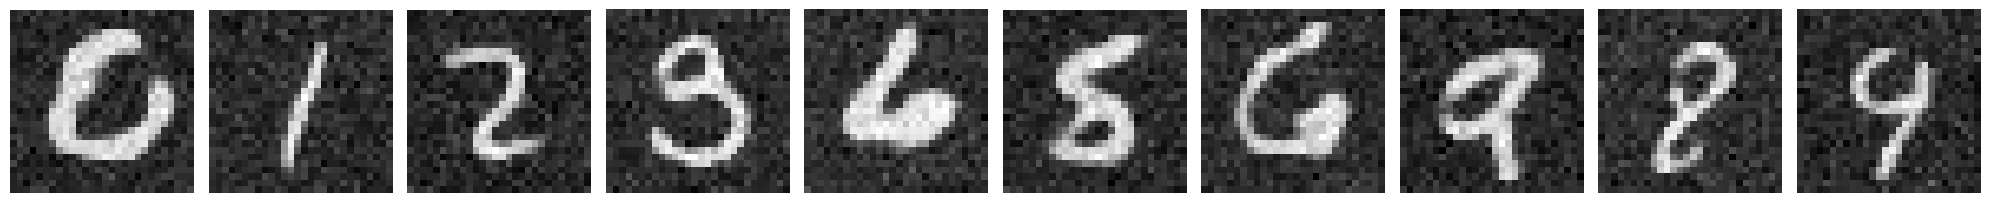

Images saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/trajectory_step_1000/


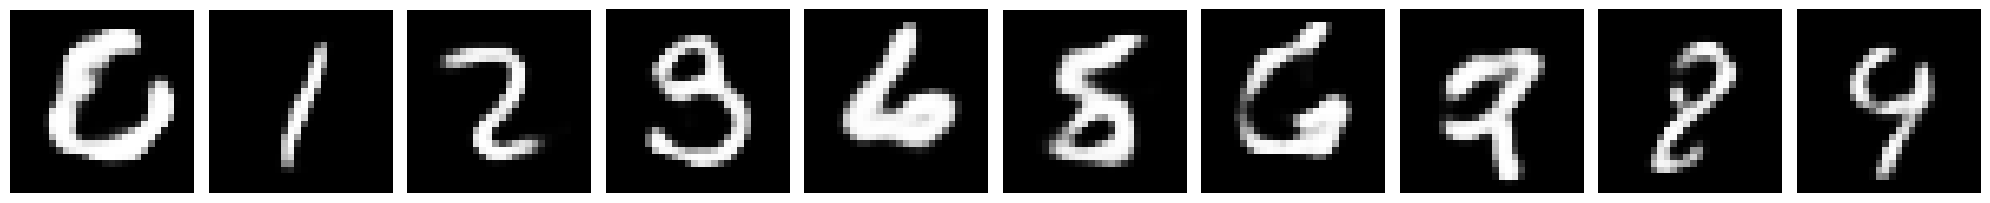

In [26]:
timesteps = np.arange(0, bbdm_config.T+1, 100)

for i in timesteps:
    visualize_images(outs_bbdm["trajectory"][i],  max_images=10,
                     save_dir=bbdm_fig_dir + f"trajectory_step_{i}/")

In [33]:
def save_individual_trajectory_grids(trajectory_dict, timesteps, save_dir, prefix="digit_trajectory", set_title=False):
    """
    Save each digit's trajectory as a separate 1x10 grid
    
    Args:
        trajectory_dict: Dictionary containing trajectory data for each timestep
        timesteps: List of timesteps to visualize (should be 10 timesteps)
        save_dir: Directory to save the grid images
        prefix: Prefix for saved filenames
    """
    os.makedirs(save_dir, exist_ok=True)
    
    # Get trajectory length
    traj_length = len(timesteps)
    
    # Save individual digit trajectories as 1x10 grids
    for digit_idx in range(10):
        fig, axes = plt.subplots(1, traj_length, figsize=(2*traj_length, 3))
        
        # Handle single timestep case
        if traj_length == 1:
            axes = [axes]
            
        for time_idx, timestep in enumerate(timesteps):
            # Get the image for this digit at this timestep
            if torch.is_tensor(trajectory_dict[timestep]):
                img = trajectory_dict[timestep][digit_idx].detach().cpu().numpy()
            else:
                img = trajectory_dict[timestep][digit_idx]
                
            axes[time_idx].imshow(img, cmap='gray')
            if set_title:
                axes[time_idx].set_title(f't={timestep}', fontsize=10)
            axes[time_idx].axis('off')
        
        if set_title:
            plt.suptitle(f'Digit {digit_idx} Trajectory', fontsize=14)
        plt.tight_layout()
        
        # Save individual digit trajectory as 1x10 grid
        digit_path = os.path.join(save_dir, f"{prefix}_digit_{digit_idx:02d}.png")
        fig.savefig(digit_path, bbox_inches='tight', dpi=150)
        plt.close(fig)
        
    print(f"Individual trajectory grids saved to: {save_dir}")

In [34]:
# Save individual GSM trajectory grids (1x10 for each digit)
gsm_timesteps_10 = np.linspace(0, gsm_config.T, 10, dtype=int)
save_individual_trajectory_grids(outs_gsm["trajectory"], gsm_timesteps_10, 
                                gsm_fig_dir + "individual_trajectories/", 
                                prefix="gsm_digit_trajectory")

Individual trajectory grids saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/GSM/models/visualizations/individual_trajectories/


In [35]:
# Save individual BBDM trajectory grids (1x10 for each digit)
bbdm_timesteps_10 = np.linspace(0, bbdm_config.T, 10, dtype=int)
save_individual_trajectory_grids(outs_bbdm["trajectory"], bbdm_timesteps_10, 
                                bbdm_fig_dir + "individual_trajectories/", 
                                prefix="bbdm_digit_trajectory")

Individual trajectory grids saved to: /Users/tuanle/Desktop/projects/symmetry-induced-score-matching/sism/mnist/experiments/BBDM/models/visualizations/individual_trajectories/
